<a href="https://colab.research.google.com/github/VladimirKravtsov36/mlcourse.ai/blob/master/AI_Kravtsov.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Dropout, Flatten
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model, Sequential
from keras.datasets import cifar10
from keras.utils import np_utils
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
from keras.layers.normalization import BatchNormalization
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
np.random.seed(42)

In [ ]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /=255 

In [ ]:
y_train_cat = np_utils.to_categorical(y_train, 10)
y_test_cat = np_utils.to_categorical(y_test, 10)

In [ ]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X_train)

In [ ]:
lenet = Sequential()

lenet.add(Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='sigmoid', input_shape=X_train.shape[1:], padding="same"))
lenet.add(BatchNormalization())
lenet.add(AveragePooling2D(pool_size=(2, 2), strides=(1, 1), padding='valid'))
lenet.add(Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='sigmoid', padding='valid'))
lenet.add(BatchNormalization())
lenet.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))
lenet.add(Conv2D(120, kernel_size=(5, 5), strides=(1, 1), activation='sigmoid', padding='valid'))
lenet.add(BatchNormalization())
lenet.add(Flatten())
lenet.add(Dense(120, activation='sigmoid'))
lenet.add(Dropout(0.4))
lenet.add(BatchNormalization())
lenet.add(Dense(84, activation='sigmoid'))
lenet.add(Dropout(0.2))
lenet.add(BatchNormalization())
lenet.add(Dense(y_train_cat.shape[1], activation='softmax'))

lenet.compile(loss=categorical_crossentropy, optimizer='adam', metrics=['accuracy'])

In [ ]:
lenet.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 6)         456       
_________________________________________________________________
batch_normalization_8 (Batch (None, 32, 32, 6)         24        
_________________________________________________________________
average_pooling2d (AveragePo (None, 31, 31, 6)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 27, 27, 16)        2416      
_________________________________________________________________
batch_normalization_9 (Batch (None, 27, 27, 16)        64        
_________________________________________________________________
average_pooling2d_1 (Average (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 9, 9, 120)        

In [ ]:
lrr = ReduceLROnPlateau(monitor='val_accuracy',patience=2,verbose=1,factor=0.5, min_lr=0.0000005)
early_stop = EarlyStopping(monitor='val_accuracy', patience=4)

оставить 50 эпох и ниже тоже



In [ ]:
history_le = lenet.fit(datagen.flow(X_train, y_train_cat, batch_size=32), epochs=100,
                       validation_data=(X_test, y_test_cat), callbacks=[lrr, early_stop])

Epoch 1/100
1563/1563 [==============================] - 27s 17ms/step - loss: 2.0919 - accuracy: 0.2511 - val_loss: 1.8952 - val_accuracy: 0.3393
Epoch 2/100
1563/1563 [==============================] - 28s 18ms/step - loss: 1.7488 - accuracy: 0.3561 - val_loss: 1.6189 - val_accuracy: 0.4163
Epoch 3/100
1563/1563 [==============================] - 27s 17ms/step - loss: 1.6410 - accuracy: 0.4016 - val_loss: 1.5196 - val_accuracy: 0.4425
Epoch 4/100
1563/1563 [==============================] - 28s 18ms/step - loss: 1.5804 - accuracy: 0.4264 - val_loss: 1.4444 - val_accuracy: 0.4703
Epoch 5/100
1563/1563 [==============================] - 27s 17ms/step - loss: 1.5210 - accuracy: 0.4499 - val_loss: 1.3511 - val_accuracy: 0.5148
Epoch 6/100
1563/1563 [==============================] - 27s 17ms/step - loss: 1.4775 - accuracy: 0.4701 - val_loss: 1.2666 - val_accuracy: 0.5459
Epoch 7/100
1563/1563 [==============================] - 27s 17ms/step - loss: 1.4376 - accuracy: 0.4859 - val_loss: 1

In [ ]:
lenet.save('lenet.h5')

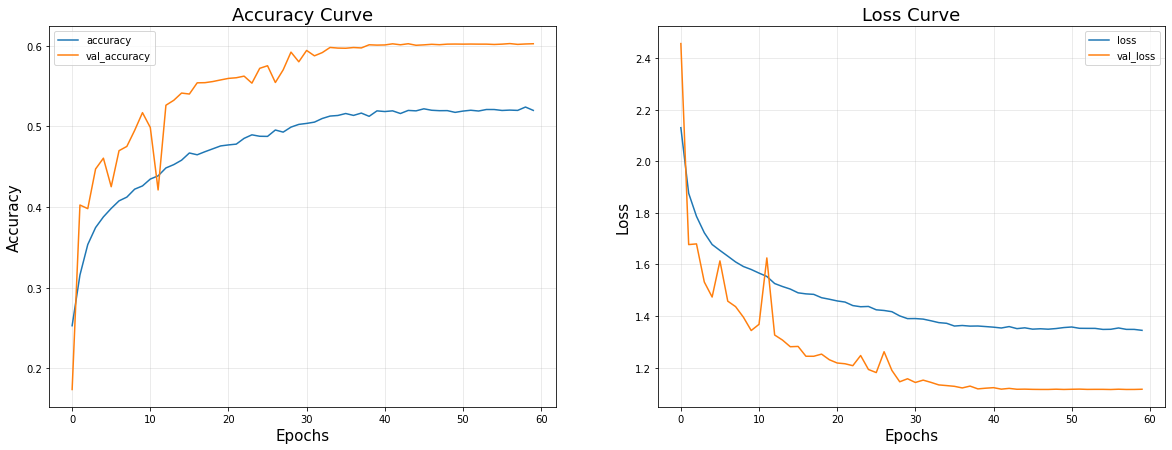

In [ ]:
f = plt.figure(figsize=(20,7))


f.add_subplot(121)

plt.plot(history_le.epoch,history_le.history['accuracy'],label = "accuracy") 
plt.plot(history_le.epoch,history_le.history['val_accuracy'],label = "val_accuracy") 

plt.title("Accuracy Curve",fontsize=18)
plt.xlabel("Epochs",fontsize=15)
plt.ylabel("Accuracy",fontsize=15)
plt.grid(alpha=0.3)
plt.legend()


f.add_subplot(122)

plt.plot(history_le.epoch,history_le.history['loss'],label="loss") # Loss curve for training set
plt.plot(history_le.epoch,history_le.history['val_loss'],label="val_loss") # Loss curve for validation set

plt.title("Loss Curve",fontsize=18)
plt.xlabel("Epochs",fontsize=15)
plt.ylabel("Loss",fontsize=15)
plt.grid(alpha=0.3)
plt.legend()

plt.show()

In [ ]:
lenet.predict(X_test)

array([[8.8641122e-03, 4.1858382e-03, 4.2181525e-02, ..., 1.3543873e-02,
        1.1666744e-02, 2.8896350e-03],
       [6.4075790e-02, 5.0885624e-01, 2.6051472e-03, ..., 5.4441812e-04,
        3.3757371e-01, 8.3020799e-02],
       [1.4869709e-01, 1.2256340e-01, 3.5957955e-03, ..., 1.2095191e-03,
        6.7220801e-01, 4.7761068e-02],
       ...,
       [2.7637838e-03, 1.3145956e-03, 3.3951953e-02, ..., 3.9310630e-02,
        3.1995391e-03, 2.5861582e-03],
       [3.1728452e-01, 3.9197880e-01, 4.4906504e-02, ..., 2.9063022e-02,
        8.5747764e-02, 7.0471384e-02],
       [9.6001709e-04, 2.6875024e-04, 9.1497861e-03, ..., 8.6658353e-01,
        4.2578584e-05, 2.0881882e-03]], dtype=float32)

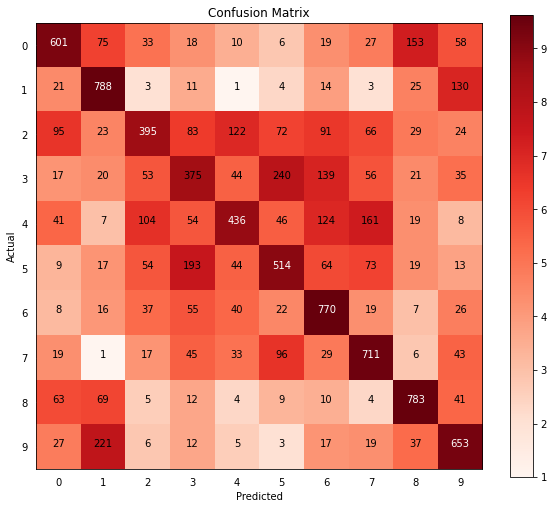

In [ ]:
preds = np.argmax(lenet.predict(X_test),axis =1)

error = 0
confusion_matrix = np.zeros([10,10])
for i in range(X_test.shape[0]):
    confusion_matrix[y_test[i],preds[i]] += 1
    if y_test[i]!=preds[i]:
        error +=1

f = plt.figure(figsize=(10,8.5))
f.add_subplot(111)

plt.imshow(np.log2(confusion_matrix+1),cmap="Reds")
plt.colorbar()
plt.tick_params(size=5,color="white")
plt.xticks(np.arange(0,10),np.arange(0,10))
plt.yticks(np.arange(0,10),np.arange(0,10))

threshold = confusion_matrix.max()/2 

for i in range(10):
    for j in range(10):
        plt.text(j,i,int(confusion_matrix[i,j]),horizontalalignment="center",color="white" if confusion_matrix[i, j] > threshold else "black")
        
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Alex Net

In [ ]:
#Instantiate an empty model
alexnet = Sequential()


alexnet.add(Conv2D(filters=96, input_shape=X_train.shape[1:], kernel_size=(11,11), strides=(4,4), padding='same', activation='relu'))
alexnet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))
alexnet.add(BatchNormalization())

alexnet.add(Conv2D(filters=256, kernel_size=(11,11), strides=(1,1), padding='same', activation='relu'))
alexnet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))
alexnet.add(BatchNormalization())

alexnet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
alexnet.add(BatchNormalization())
alexnet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
alexnet.add(BatchNormalization())
alexnet.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
alexnet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))
alexnet.add(BatchNormalization())

alexnet.add(Flatten())
alexnet.add(Dense(4096, input_shape=X_train.shape[1:], activation='relu')) 
alexnet.add(Dropout(0.4))
alexnet.add(BatchNormalization())

alexnet.add(Dense(4096, activation='relu'))
alexnet.add(Dropout(0.4))
alexnet.add(BatchNormalization())

alexnet.add(Dense(1000, activation='relu'))
alexnet.add(Dropout(0.4))
alexnet.add(BatchNormalization())

alexnet.add(Dense(y_train_cat.shape[1], activation='softmax'))

alexnet.summary()

alexnet.compile(loss=categorical_crossentropy, optimizer='adam', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 8, 8, 96)          34944     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 4, 4, 96)          0         
_________________________________________________________________
batch_normalization (BatchNo (None, 4, 4, 96)          384       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 4, 4, 256)         2973952   
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 2, 2, 256)         0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 2, 2, 256)         1024      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 2, 2, 384)         8

In [ ]:
history_alex = alexnet.fit(datagen.flow(X_train, y_train_cat, batch_size=32),
                           epochs=100, validation_data=(X_test, y_test_cat), callbacks=[lrr, early_stop])

Epoch 1/100
1563/1563 [==============================] - 43s 28ms/step - loss: 2.0274 - accuracy: 0.2957 - val_loss: 1.8729 - val_accuracy: 0.3601
Epoch 2/100
1563/1563 [==============================] - 43s 27ms/step - loss: 1.6215 - accuracy: 0.4226 - val_loss: 1.5357 - val_accuracy: 0.4638
Epoch 3/100
1563/1563 [==============================] - 43s 27ms/step - loss: 1.4854 - accuracy: 0.4750 - val_loss: 1.5104 - val_accuracy: 0.4816
Epoch 4/100
1563/1563 [==============================] - 43s 27ms/step - loss: 1.3814 - accuracy: 0.5166 - val_loss: 1.3612 - val_accuracy: 0.5226
Epoch 5/100
1563/1563 [==============================] - 43s 27ms/step - loss: 1.2985 - accuracy: 0.5476 - val_loss: 1.2401 - val_accuracy: 0.5696
Epoch 6/100
1563/1563 [==============================] - 43s 28ms/step - loss: 1.2278 - accuracy: 0.5730 - val_loss: 1.1838 - val_accuracy: 0.5899
Epoch 7/100
1563/1563 [==============================] - 43s 27ms/step - loss: 1.1602 - accuracy: 0.5986 - val_loss: 1

In [ ]:
alexnet.save('alexnet.h5')


вставить адам или рмс в ленет


# best net


In [ ]:
mod_net = Sequential()

mod_net.add(Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='relu', input_shape=X_train.shape[1:], padding="same"))
mod_net.add(BatchNormalization())
mod_net.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding='valid'))

mod_net.add(Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding='valid'))
mod_net.add(BatchNormalization())
mod_net.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))

mod_net.add(Conv2D(120, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding='valid'))
mod_net.add(BatchNormalization())


mod_net.add(Flatten())
mod_net.add(Dense(512, activation='relu'))
mod_net.add(Dropout(0.4))
mod_net.add(BatchNormalization())

mod_net.add(Dense(120, activation='relu'))
mod_net.add(Dropout(0.4))
mod_net.add(BatchNormalization())

mod_net.add(Dense(84, activation='relu'))
mod_net.add(Dropout(0.2))
mod_net.add(BatchNormalization())

mod_net.add(Dense(y_train_cat.shape[1], activation='softmax'))

mod_net.compile(loss=categorical_crossentropy, optimizer='adam', metrics=['accuracy'])
mod_net.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 6)         456       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 6)         24        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 27, 27, 16)        2416      
_________________________________________________________________
batch_normalization_1 (Batch (None, 27, 27, 16)        64        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 120)         4

In [ ]:
history_mod = mod_net.fit(datagen.flow(X_train, y_train_cat, batch_size=32), epochs=100,
                       validation_data=(X_test, y_test_cat), callbacks=[lrr, early_stop])

Epoch 1/100
1563/1563 [==============================] - 29s 19ms/step - loss: 1.8153 - accuracy: 0.3417 - val_loss: 1.5812 - val_accuracy: 0.4298
Epoch 2/100
1563/1563 [==============================] - 29s 18ms/step - loss: 1.4665 - accuracy: 0.4764 - val_loss: 1.1910 - val_accuracy: 0.5739
Epoch 3/100
1563/1563 [==============================] - 29s 18ms/step - loss: 1.3290 - accuracy: 0.5347 - val_loss: 1.2045 - val_accuracy: 0.5755
Epoch 4/100
1563/1563 [==============================] - 29s 19ms/step - loss: 1.2436 - accuracy: 0.5690 - val_loss: 1.0211 - val_accuracy: 0.6370
Epoch 5/100
1563/1563 [==============================] - 29s 18ms/step - loss: 1.1818 - accuracy: 0.5880 - val_loss: 1.2988 - val_accuracy: 0.5488
Epoch 6/100
1563/1563 [==============================] - 29s 18ms/step - loss: 1.1484 - accuracy: 0.6039 - val_loss: 0.9675 - val_accuracy: 0.6624
Epoch 7/100
1563/1563 [==============================] - 29s 18ms/step - loss: 1.1043 - accuracy: 0.6210 - val_loss: 1

было 78
